In [1]:
import pandas as pd 
import numpy as  np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [28]:
data= pd .read_csv('heart_failure_clinical_records_dataset.csv.xls')

In [3]:
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
data.shape

(299, 13)

Boolean features
 * Sex - Gender of patient Male = 1, Female =0
 * Diabetes - 0 = No, 1 = Yes
 * Anaemia - 0 = No, 1 = Yes
 * High_blood_pressure - 0 = No, 1 = Yes
 * Smoking - 0 = No, 1 = Yes
 * DEATH_EVENT - 0 = No, 1 = Yes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.isna().sum()# there aren't missing value in our data

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
for col in data.columns:
    print(f"\n\nNumber of unique values in {col}:\n")
    print(len(data[col].unique()))



Number of unique values in age:

47


Number of unique values in anaemia:

2


Number of unique values in creatinine_phosphokinase:

208


Number of unique values in diabetes:

2


Number of unique values in ejection_fraction:

17


Number of unique values in high_blood_pressure:

2


Number of unique values in platelets:

176


Number of unique values in serum_creatinine:

40


Number of unique values in serum_sodium:

27


Number of unique values in sex:

2


Number of unique values in smoking:

2


Number of unique values in time:

148


Number of unique values in DEATH_EVENT:

2


In [8]:
x=data.drop("DEATH_EVENT",axis=1)
y=data["DEATH_EVENT"]

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [30]:
data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

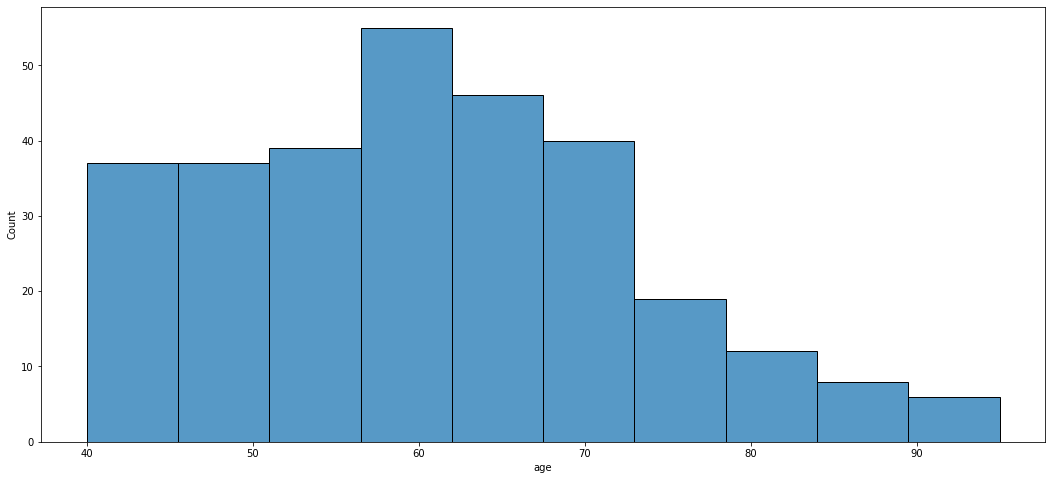

In [11]:
plt.figure(figsize=(18,8))
sns.histplot(data=data,x='age',palette='chinstrap')
plt.show()

this histogram show us that the frequent age is 60 YO and the merge between 60and 75 are the most have the heart-failure

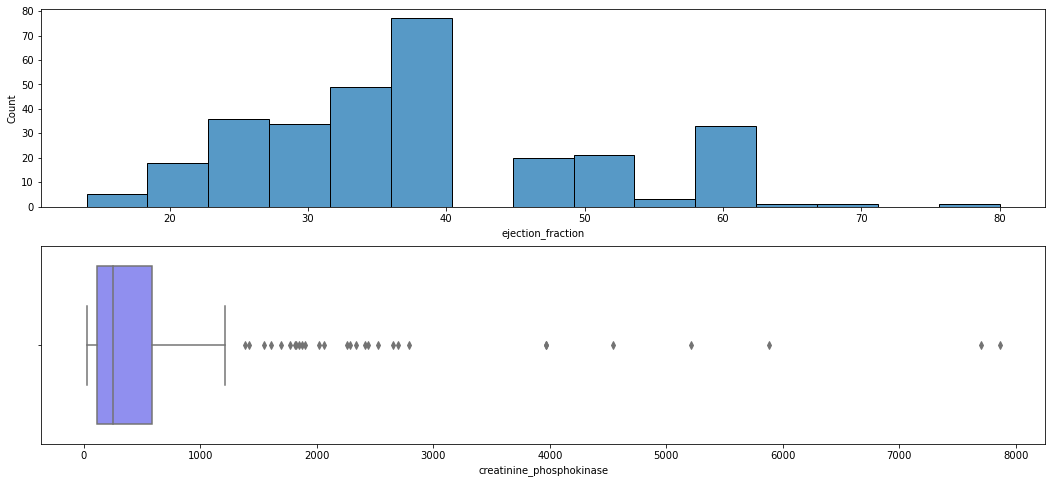

In [12]:
fig , axes=plt.subplots(ncols=1 , nrows=2, figsize=(18,8))
sns.histplot(data=data,x='ejection_fraction',palette='cool',ax=axes[0])
sns.boxplot(data=data,x='creatinine_phosphokinase',palette='cool',ax=axes[1])
plt.show()

the histogram show us that the most frequent value of Percentage of blood leaving is around 35 the boxplot show us that there are outliers and the quantile of order 800 Level of the CPK enzyme in the blood.

In [13]:
data['creatinine_phosphokinase'].median()

250.0

In [14]:
data['creatinine_phosphokinase'].mean()# is affect by the outliers 

581.8394648829432

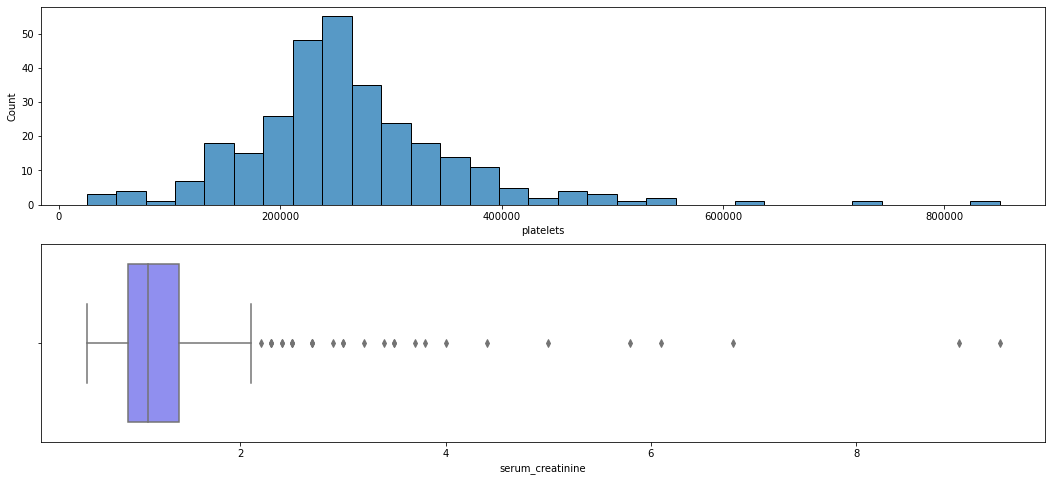

In [15]:
fig , axes=plt.subplots(ncols=1 , nrows=2, figsize=(18,8))
sns.histplot(data=data,x='platelets',palette='cool',ax=axes[0])
sns.boxplot(data=data,x='serum_creatinine',palette='cool',ax=axes[1])
plt.show()

categorical features

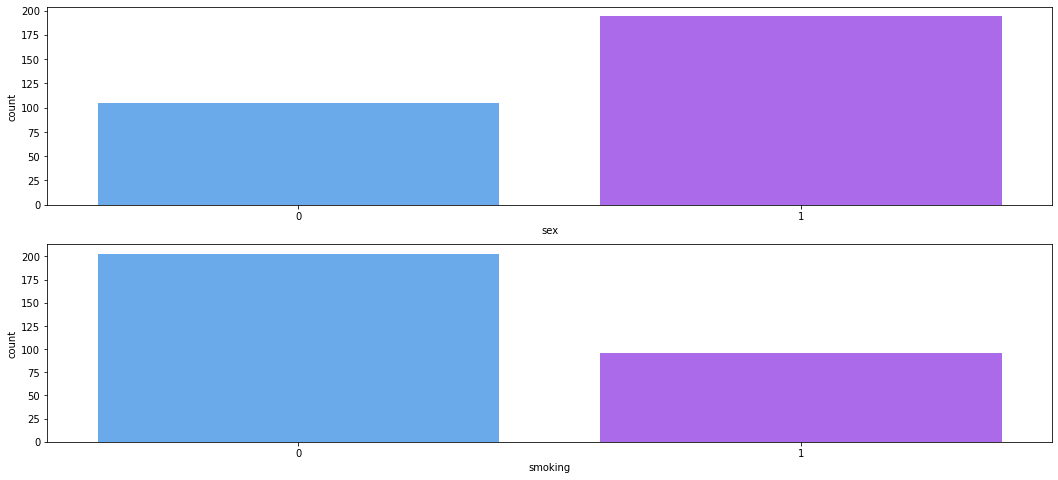

In [16]:
fig , axes=plt.subplots(ncols=1 , nrows=2, figsize=(18,8))
sns.countplot(data=data,x='sex',palette='cool',ax=axes[0])
sns.countplot(data=data,x='smoking',palette='cool',ax=axes[1])
plt.show()

the first graph show that the most patient have heart-failure are male

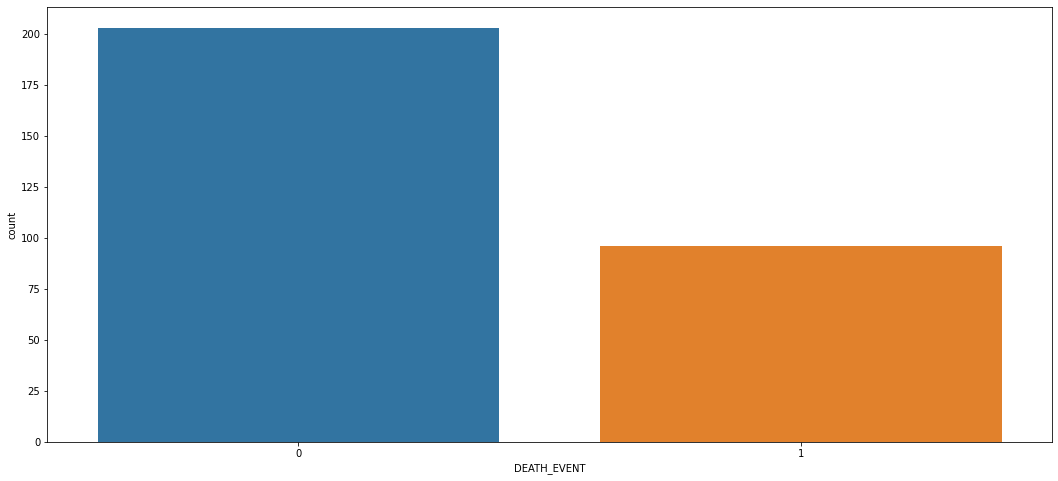

In [17]:
plt.figure(figsize=(18,8))
sns.countplot(data=data,x='DEATH_EVENT')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
tree=DecisionTreeRegressor(random_state=11)

In [22]:
xtrain

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
233  53.0        1                       707         0                 38   
21   65.0        1                       128         1                 30   
136  65.0        1                        59         1                 60   
269  40.0        0                       582         1                 35   
155  60.0        1                       231         1                 25   
..    ...      ...                       ...       ...                ...   
5    90.0        1                        47         0                 40   
112  50.0        0                       369         1                 25   
19   48.0        1                       582         1                 55   
147  64.0        0                      1610         0                 60   
76   70.0        0                        92         0                 60   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
233                    0   330000.0               1.4           137    1   
21                     1   297000.0               1.6           136    0   
136                    0   172000.0               0.9           137    0   
269                    0   222000.0               1.0           132    1   
155                    0   194000.0               1.7           140    1   
..                   ...        ...               ...           ...  ...   
5                      1   204000.0               2.1           132    1   
112                    0   252000.0               1.6           136    1   
19                     0    87000.0               1.9           121    0   
147                    0   242000.0               1.0           137    1   
76                     1   317000.0               0.8           140    0   

     smoking  time  
233        1   209  
21         0    20  
136        0   107  
269        0   244  
155        0   120  
..       ...   ...  
5          1     8  
112        0    90  
19         0    15  
147        0   113  
76         1    74  

[269 rows x 12 columns]

In [23]:
ytrain

233    0
21     1
136    0
269    0
155    0
      ..
5      1
112    0
19     1
147    0
76     0
Name: DEATH_EVENT, Length: 269, dtype: int64

In [24]:
tree.fit(xtrain, ytrain)

DecisionTreeRegressor(random_state=11)

In [25]:
ypred_train = tree.predict(xtrain)
ypred_test = tree.predict(xtest)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print("Training Results:\n")
print(classification_report(ytrain, ypred_train))
print("\n\nTesting Results:\n")
print(classification_report(ytest, ypred_test))

Training Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00        87

    accuracy                           1.00       269
   macro avg       1.00      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269



Testing Results:

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.40      0.44      0.42         9

    accuracy                           0.63        30
   macro avg       0.57      0.58      0.58        30
weighted avg       0.65      0.63      0.64        30



our model have 89% to predect the patient is affected by heart-failure,so our model is good!